In [1]:
import PIL
import numpy as np
import matplotlib.pylab as plt

In [2]:
filename = 'mona_lisa_bw.jpg'
im = PIL.Image.open(filename)
d = np.array(im)[...,0]

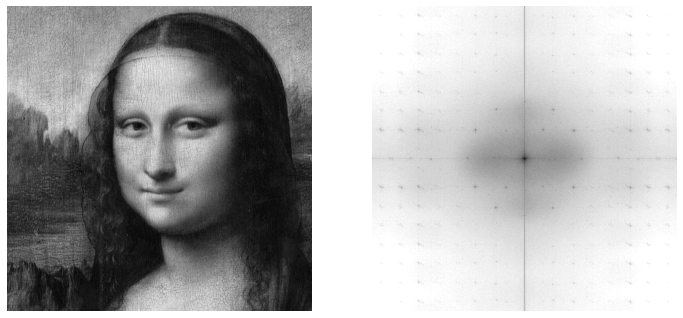

In [3]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(d, cmap='gray')
plt.gca().axis('off')
plt.subplot(122)
_d = np.fft.fft2(d)
plt.imshow(np.fft.fftshift(np.log10(np.abs(_d)**2)), vmax=15, vmin=6, cmap='gist_yarg')
_ = plt.gca().axis('off')

In [4]:
_d = np.fft.fft2(d)
_x = np.fft.fftfreq(d.shape[0], 1./d.shape[0])
_y = np.fft.fftfreq(d.shape[1], 1./d.shape[1])

_xs = np.fft.fftshift(_x)
_ys = np.fft.fftshift(_y)
_x.shape = (_x.size,1)
_y.shape = (1,_y.size)
_x0, _y0 = 20, 0 # offset for illustrating plane waves
r = np.sqrt((_x-_x0)**2 + (_y-_x0)**2)

/tmp/ipykernel_200377/1035056350.py:6: RuntimeWarning: divide by zero encountered in log10
  pwr = np.log10(np.abs(_dm)**2)


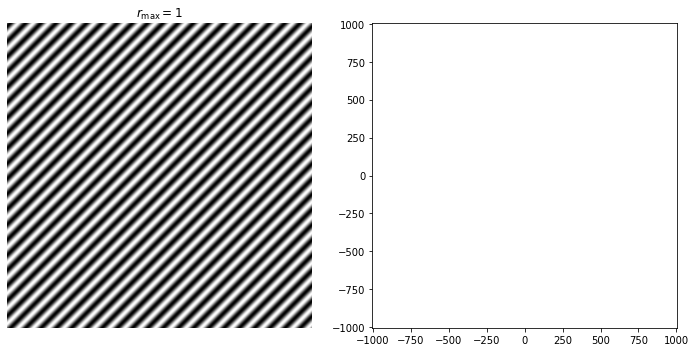

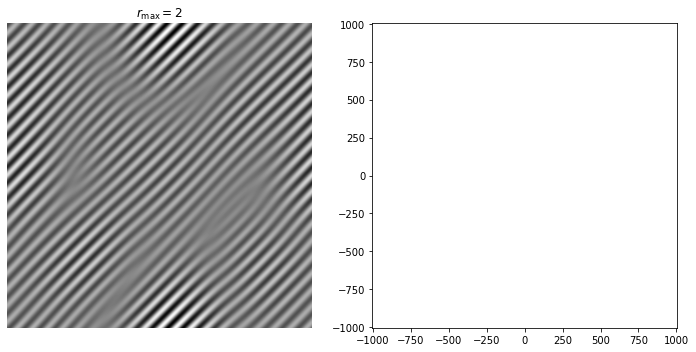

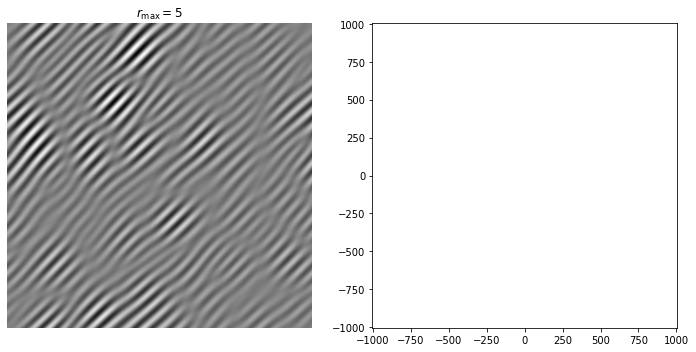

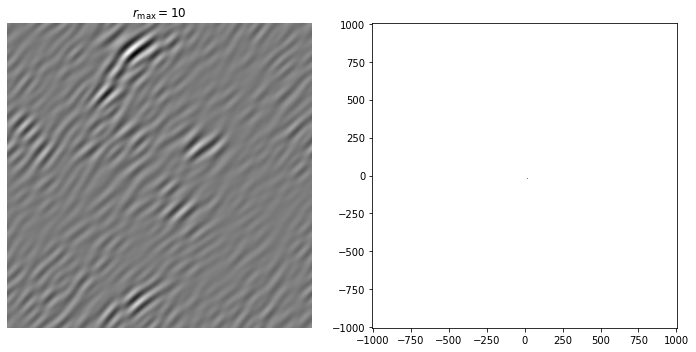

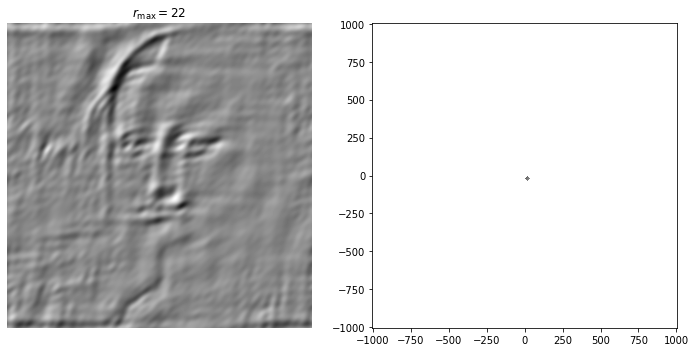

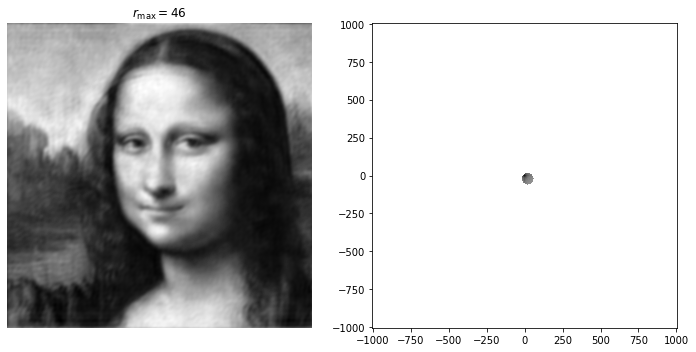

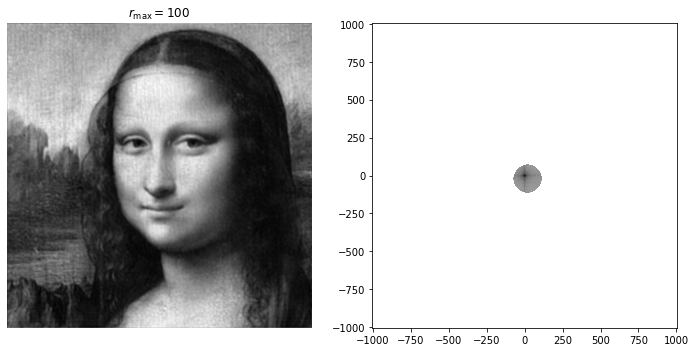

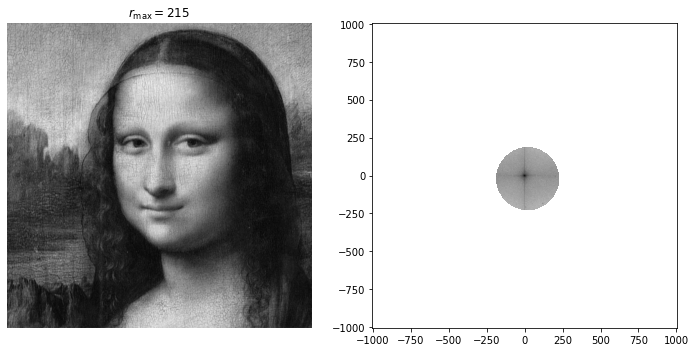

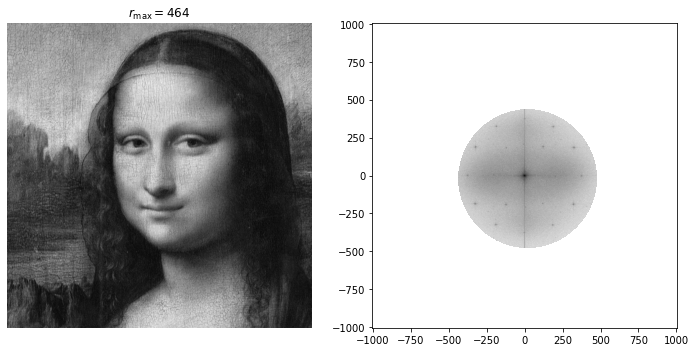

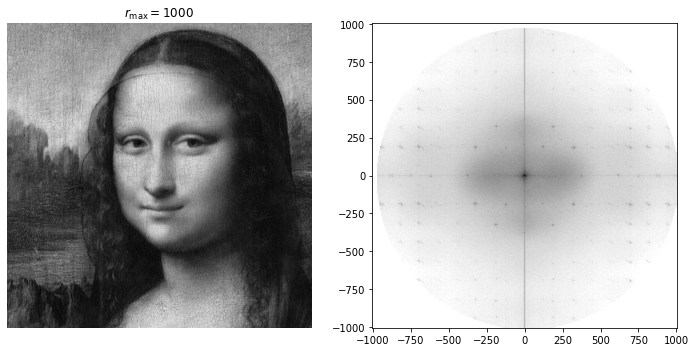

In [5]:
for cut in np.logspace(0, 3, 10):
    mask = np.where(r < cut, 1, 0)

    _dm = _d * mask
    dm = np.fft.ifft2(_dm).real
    pwr = np.log10(np.abs(_dm)**2)
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.imshow(dm, cmap='gray')
    plt.title(r'$r_{\rm max}=' + str(round(cut)) + '$')
    plt.gca().axis('off')
    plt.subplot(122)
    plt.imshow(np.fft.fftshift(pwr),
        extent=(_xs[0],_xs[-1],_ys[0],_ys[-1]), 
        vmax=15, vmin=6, cmap='gist_yarg')